# Decision Tree Regression
A decision tree will split data points into leafs (segments or clusters).

How and where the splits are determined by calculating information entropy of a leaf.
- Information Entropy follows Homogeneity: group a data point with similar data points
- The algorithm will stop splitting when it crosses a minimum threshold to create a leaf
    - Ex: If a leaf has less than 5% of the total data points, then the leaf won't be created
    
The final leafs that were created and used in the decision tree are called "terminal leafs."
- Each final leaf's value is the average of the y-values of the data points in the leaf

### When to Use Decision Trees?
Decision Trees are best used in many dimensions (multiple independent variables). This is because the information entropies of the independent variable values are calculated and the most similar of these independent variable values are clustered together.

# Example of a Decision Tree
### Decision Tree Splits
<img src="images/dtr/decision_tree_intuition.png" height="75%" width="75%"></img>

This diagram shows the x1 and x2 plane for the independent variables in the data set. It shows how they were split into 5 terminal leaf regions.

Each terminal leaf has a value, which is the average of the y-values among the data points in the terminal leaf.

### Decision Tree
<img src="images/dtr/decision_tree_example.png" height="50%" width="50%"></img>

This decision tree was created from the terminal leafs in the above diagram.

We can predict x-values by traversing through the decision tree.

For example, if X1 = 25 and X2 = 250, then we can predict the value:
- Since X1 is not less than 20, we traverse through the "No" branch
- Since X2 is not less than 170, we traverse through the "No" branch
- Now we arrived at the terminal leaf of 1023, so the predicted y-value is 1023

As you can see, the independent variables do not out-scale each other when predicting values, so feature scaling is not necessary for decision tree regression.

Although this decision tree doesn't seem accurate, SKLearn's decision tree algorithm uses advanced information entropy algorithms to decide the best terminal leafs.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
customers_df = pd.read_csv("datasets/position_salaries.csv")

customers_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# the independent variable is the Level
x = customers_df.iloc[:, 1:2].values

# the dependent variable is the Salary
y = customers_df.iloc[:, 2].values

In [4]:
# import the decision tree regressor class
from sklearn.tree import DecisionTreeRegressor

In [6]:
# create a regressor with a random state (seed) of 0, then fit to the data set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

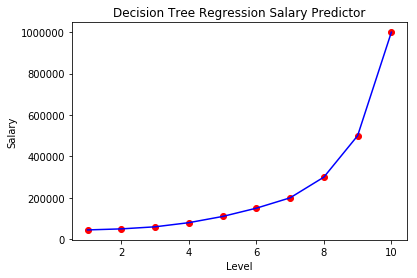

In [10]:
# scatter plot the actual data
plt.scatter(x, y, color="red")

# use the SVR data points to plot the predicted data
plt.plot(x, regressor.predict(x), color="blue")

# labels
plt.title("Decision Tree Regression Salary Predictor")
plt.xlabel("Level")
plt.ylabel("Salary")

plt.show()

# Decision Tree Trap!
Decision Trees uses the entropy of information (independent variables), but the decision tree is a non-continous and non-linear machine learning model.
- Because decision trees attempt to get the average values of terminal leafs, and we're using a single independent variable (1-D space), it will only plot the 10 levels exactly and not any values in-between the levels

Therefore, we cannot represent a decision tree as a graphical model since it's NOT continous.

### Best Way to Visualize Non-Continous Model?
The best way to visualize such a model is by creating higher resolutions (separate the x-values even more).

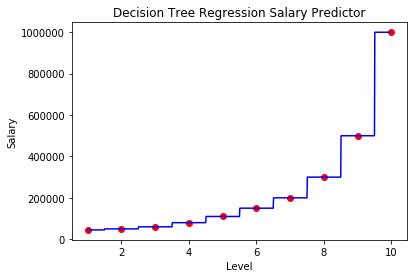

In [12]:
# increase the x-values resolution to 0.01 separations
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)

# scatter plot the actual values
plt.scatter(x, y, color="red")

# line plot the predicted values with higher resolution
plt.plot(x_grid, regressor.predict(x_grid), color="blue")

# labels
plt.title("Decision Tree Regression Salary Predictor")
plt.xlabel("Level")
plt.ylabel("Salary")

plt.show()

# Much Better Visualizations
Because a decision tree splits into different intervals, we can clearly see these intervals with the vertical line separations within the graph.

Because decision trees use the average of terminal leafs, we can determine the terminal leafs.
- For instance, for the interval between 5.5 and 6.5 the salary is predicted to be 150,000
    - This means a terminal leaf that was created by the decision tree at x-values from 5.5 to 6.5

In [13]:
# predict 6.5 level
y_pred = regressor.predict([[6.5]])

y_pred

array([150000.])